In [1]:
# Normalise features
# Find the optimal parameters C (inverse regulalisation strengths)
# Find the best features to predict stock movement (up or down)
# Convert probability into absolute values (stock % increase/decrease)
# SVC, RandomForest, MinMax, LongShortTermMemory

%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib
import matplotlib.pyplot as plt
import datetime
import math

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from collections import OrderedDict
from sklearn.metrics import mean_squared_error


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
pd_raw = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'example.csv'))

In [3]:
# Convert all values in the dataframe to numbers, and ignore the date string format
pd_processed = pd_raw.iloc[5:-2 , :].reset_index(drop=True).apply(pd.to_numeric, errors='ignore') 
display(pd_processed)

,DATE,AMZN,AMZN.1,AMZN.2,AMZN.3,AMZN.4,AMZN.5,AMZN.6,AMZN.7,AMZN.8,...,AMZN.49,AMZN.50,AMZN.51,AMZN.52,AMZN.53,AMZN.54,AMZN.55,AMZN.56,AMZN.57,AMZN.58
0,01/01/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357687.9900,NaN
1,02/01/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,357687.9900,NaN
2,03/01/2017,753.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359500.5900,NaN
3,04/01/2017,757.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361174.8600,NaN
4,05/01/2017,780.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372274.6500,NaN
5,06/01/2017,795.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379687.2300,NaN
6,09/01/2017,796.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380130.8400,NaN
7,10/01/2017,795.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379644.3000,NaN
8,11/01/2017,799.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381132.5400,NaN
9,12/01/2017,813.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,388106.2800,NaN


In [4]:

class Company(object):
    def __init__(self, name, pdframe):
        self.name = name
        self.share_prices = pdframe[name]
        self.converted_dates = self.preprocess_dates_raw(pdframe["DATE"])
        self.indicator_names_dict = {
            name + ".1" : "Common Shares Outstanding",
            name + ".2" : "Avg. Basic Shares Outstanding",
            name + ".3" : "Avg. Diluted Shares Outstanding",
            name + ".4" : "Revenues",
            name + ".5" : "COGS",
            name + ".6" : "SG&A",
            name + ".7" : "R&D",
            name + ".8" : "EBIT",
            name + ".9" : "EBITDA",
            name + ".10" : "Interest expense, net",
            name + ".11" : "Abnormal Gains/Losses",
            name + ".12" : "Income Taxes",
            name + ".13" : "Net Income from Discontinued Op.",
            name + ".14" : "Net Profit",
            name + ".15" : "Dividends",
            name + ".16" : "Cash and Cash Equivalents",
            name + ".17" : "Receivables",
            name + ".18" : "Current Assets",
            name + ".19" : "Net PP&E",
            name + ".20" : "Intangible Assets",
            name + ".21" : "Goodwill",
            name + ".22" : "Total Noncurrent Assets",
            name + ".23" : "Total Assets",
            name + ".24" : "Short term debt",
            name + ".25" : "Accounts Payable",
            name + ".26" : "Current Liabilities",
            name + ".27" : "Long Term Debt",
            name + ".28" : "Total Noncurrent Liabilities",
            name + ".29" : "Total Liabilities",
            name + ".30" : "Preferred Equity",
            name + ".31" : "Share Capital",
            name + ".32" : "Treasury Stock",
            name + ".33" : "Retained Earnings",
            name + ".34" : "Equity Before Minorities",
            name + ".35" : "Minorities",
            name + ".36" : "Total Equity",
            name + ".37" : "Depreciation & Amortisation",
            name + ".38" : "Change in Working Capital",
            name + ".39" : "Cash From Operating Activities",
            name + ".40" : "Net Change in PP&E & Intangibles",
            name + ".41" : "Cash From Investing Activities",
            name + ".42" : "Cash From Financing Activities",
            name + ".43" : "Net Change in Cash",
            name + ".44" : "Free Cash Flow",
            name + ".45" : "Gross Margin",
            name + ".46" : "Operating Margin",
            name + ".47" : "Net Profit Margin",
            name + ".48" : "Return on Equity",
            name + ".49" : "Return on Assets",
            name + ".50" : "Current Ratio",
            name + ".51" : "Liabilities to Equity Ratio",
            name + ".52" : "Debt to Assets Ratio",
            name + ".53" : "EV / EBITDA",
            name + ".54" : "EV / Sales",
            name + ".55" : "Book to Market",
            name + ".56" : "Operating Income / EV",
            name + ".57" : "Market Capitalisation",
            name + ".58" : "Enterprise Value"
        }
        # Note all indicator data are raw, NaN can be filtered at a later stage
        self.indicator_pdframes_dict = {
            name + ".1" : pdframe[name + ".1"],
            name + ".2" : pdframe[name + ".2"],
            name + ".3" : pdframe[name + ".3"],
            name + ".4" : pdframe[name + ".4"],
            name + ".5" : pdframe[name + ".5"],
            name + ".6" : pdframe[name + ".6"],
            name + ".7" : pdframe[name + ".7"],
            name + ".8" : pdframe[name + ".8"],
            name + ".9" : pdframe[name + ".9"],
            name + ".10" : pdframe[name + ".10"],
            name + ".11" : pdframe[name + ".11"],
            name + ".12" : pdframe[name + ".12"],
            name + ".13" : pdframe[name + ".13"],
            name + ".14" : pdframe[name + ".14"],
            name + ".15" : pdframe[name + ".15"],
            name + ".16" : pdframe[name + ".16"],
            name + ".17" : pdframe[name + ".17"],
            name + ".18" : pdframe[name + ".18"],
            name + ".19" : pdframe[name + ".19"],
            name + ".20" : pdframe[name + ".20"],
            name + ".21" : pdframe[name + ".21"],
            name + ".22" : pdframe[name + ".22"],
            name + ".23" : pdframe[name + ".23"],
            name + ".24" : pdframe[name + ".24"],
            name + ".25" : pdframe[name + ".25"],
            name + ".26" : pdframe[name + ".26"],
            name + ".27" : pdframe[name + ".27"],
            name + ".28" : pdframe[name + ".28"],
            name + ".29" : pdframe[name + ".29"],
            name + ".30" : pdframe[name + ".30"],
            name + ".31" : pdframe[name + ".31"],
            name + ".32" : pdframe[name + ".32"],
            name + ".33" : pdframe[name + ".33"],
            name + ".34" : pdframe[name + ".34"],
            name + ".35" : pdframe[name + ".35"],
            name + ".36" : pdframe[name + ".36"],
            name + ".37" : pdframe[name + ".37"],
            name + ".38" : pdframe[name + ".38"],
            name + ".39" : pdframe[name + ".39"],
            name + ".40" : pdframe[name + ".40"],
            name + ".41" : pdframe[name + ".41"],
            name + ".42" : pdframe[name + ".42"],
            name + ".43" : pdframe[name + ".43"],
            name + ".44" : pdframe[name + ".44"],
            name + ".45" : pdframe[name + ".45"],
            name + ".46" : pdframe[name + ".46"],
            name + ".47" : pdframe[name + ".47"],
            name + ".48" : pdframe[name + ".48"],
            name + ".49" : pdframe[name + ".49"],
            name + ".50" : pdframe[name + ".50"],
            name + ".51" : pdframe[name + ".51"],
            name + ".52" : pdframe[name + ".52"],
            name + ".53" : pdframe[name + ".53"],
            name + ".54" : pdframe[name + ".54"],
            name + ".55" : pdframe[name + ".55"],
            name + ".56" : pdframe[name + ".56"],
            name + ".57" : pdframe[name + ".57"],
            name + ".58" : pdframe[name + ".58"]
        }
    
    def preprocess_dates_raw(self, dates_raw):
        return pd.Series(list(map(datetime.datetime.strptime, dates_raw, len(dates_raw)*['%d/%m/%Y'])))
    
    def series_rows_filter_na(self, series, columns, reset_index): 
        if reset_index == True:
            return series.dropna().reset_index(drop=True)
        else:
            return series.dropna()

    def data_frame_rows_filter_na(self, pdframe, columns, reset_index): 
        # filter weekends share prices
        if reset_index == True:
            return pdframe.dropna(subset=[columns]).reset_index(drop=True)
        else:
            return pdframe.dropna(subset=[columns])
        
    def get_share_prices(self, start_date_string=None, end_date_string=None, start_delay=None):
        # Filter nan values (weekend share prices are nan since they are not trading!)
        non_nan_share_prices = self.series_rows_filter_na(series=self.share_prices, columns="AMZN", reset_index=False)
        non_nan_dates = self.converted_dates[non_nan_share_prices.index]
        
        # When no date parameters are passed
        if start_date_string == None and end_date_string == None:
            return non_nan_share_prices
        else:
            if start_delay != None:
                start_date = self.convert_date_string_to_datetime(start_date_string) + datetime.timedelta(days=start_delay)
            else:
                start_date = self.convert_date_string_to_datetime(start_date_string)
            end_date = self.convert_date_string_to_datetime(end_date_string)
            revelant_dates = non_nan_dates[(non_nan_dates>=start_date) & (non_nan_dates<=end_date)]
            relevant_share_prices = non_nan_share_prices[revelant_dates.index]
            return relevant_share_prices
    
    def convert_date_string_to_datetime(self, date_string):
        date_day, date_month, date_year = date_string.split("/")
        return datetime.datetime(int(date_year), int(date_month), int(date_day), 0, 0)

    def get_company_attribute_indicator_dict(self, indicator):
        attribute_indicator = dict()
        for i in range(1, 58+1):
            attribute_indicator[company_name + "." + str(i)] = indicator[str(i)]
            
    def show_pairplots(self):
        # Visualise the distribution of each attribute with share price
        selected_attributes = sorted(list(self.indicator_pdframes_dict.keys()))
        i = 5
        while i <= len(selected_attributes):
            sns.pairplot(data=pd_processed, x_vars=selected_attributes[i-5:i], y_vars = 'AMZN', size=3)
            i+=5

        #sns.pairplot(data=pd_processed, x_vars=selected_attributes[:10], y_vars = selected_attributes[:10], size=3)
    
    def get_correlation_between_attributes_and_price(self):
        # A) Calculating correlation coefficients between each attribtue and price
        # Get a list of attributes of the dataset except price remove
        
        selected_attributes = sorted(list(self.indicator_pdframes_dict.keys()))
        selected_attributes.remove("AMZN.1")
        selected_attributes.remove("AMZN.2")
        selected_attributes.remove("AMZN.3")
        
        index_of_report_earnings_release = self.series_rows_filter_na(
            self.indicator_pdframes_dict["AMZN.4"], "AMZN.4", reset_index=False).index

        price_correlation = dict() # dictionary to keep track the correlation of attributes with prices
        nan_corr_attributes = list()
        for attribute in selected_attributes:
            corr = np.corrcoef(self.indicator_pdframes_dict[attribute][index_of_report_earnings_release], 
                               self.share_prices[index_of_report_earnings_release])
            if math.isnan(corr[0][1]):
                nan_corr_attributes.append(self.indicator_names_dict[attribute])
            else:
                price_correlation[corr[0][1]] = attribute

        print("NaN Correlation attributes: ", ", ".join(nan_corr_attributes))
        # sort a dict by value and print out the highest correlating attributes
        correlation_rank = list(price_correlation.keys())

        for key in sorted(correlation_rank, reverse=True): # sort from highest to lowest
            print(str(round(key, 3)) + " " + price_correlation[key] + ": " + self.indicator_names_dict[price_correlation[key]])
    
    def score(self, predictions):
        rmse = sqrt(mean_squared_error(self.test_raw, predictions))
        return rmse






In [5]:
class CompanyBaseline(Company):
    def __init__(self, name, pdframe):
        Company.__init__(self, name, pdframe)
        self.train_raw = None
        self.test_raw = None
    
    def train_baseline_model(self, train):
        pass
        
    def preprocess_train_test_data(self, train_start_date_string, train_end_test_start_date_string, test_end_date_string):
        # transform data to be stationary
        self.train_raw = self.get_share_prices(train_start_date_string, train_end_test_start_date_string)
        # To avoid overlap between training and test data, the datetime is incremented by 1 day
        self.test_raw = self.get_share_prices(train_end_test_start_date_string, test_end_date_string, start_delay=1)
        return self.train_raw, self.test_raw

    def baseline_predict(self, test):
        #Persistence Model Forecast, basically, the same share price with 1 date timelag
        # e.g. the predicted share price at time t, is t-1
        predictions = test.shift(1)
        # Special case of the first value is changed to the zero 
        predictions.set_value(predictions.index[0], self.train_raw.values[-1])
        #display(predictions)
        return predictions
    
    def plot(self, predictions):
        # line plot of observed vs predicted
        train_index = self.train_raw.index.tolist()
        test_index = self.test_raw.index.tolist()

        #display(raw_values)
        formatter = matplotlib.dates.DateFormatter('%d/%m/%Y')            
        plt.plot(self.converted_dates[test_index], predictions, ':', marker= 'x', label="Predicted prices")
        plt.plot(self.converted_dates[train_index + test_index], self.train_raw.append(self.test_raw), '-', marker= ".", label="Actual prices")
        ax = pyplot.gcf().axes[0] 
        ax.xaxis.set_major_formatter(formatter)
        ax.legend()
        plt.gcf().autofmt_xdate(rotation=25)
        plt.gcf().set_size_inches(15, 10)
        plt.xlabel("Time")
        plt.ylabel("Share Price ($)")
        plt.show()
        

In [6]:
def get_relevant_columns_for_company(name):
    columns = list()
    columns.append("DATE")
    columns.append(name)
    for i in range(1, 58+1):
        columns.append(name + "." +str(i))
    return columns

start_train_date = "01/01/2017"
end_train_start_test_date = "01/05/2017"
end_test_date = "01/10/2017"

D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


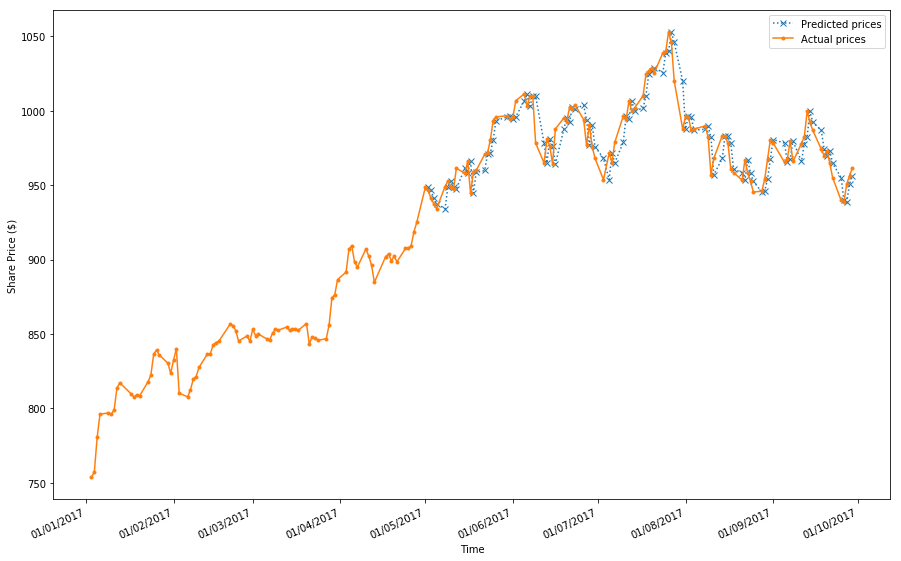

Baseline Score: 11.073 US dollar


In [7]:
amzn_baseline = CompanyBaseline("AMZN", pd_processed[get_relevant_columns_for_company("AMZN")])

train, test = amzn_baseline.preprocess_train_test_data(start_train_date, end_train_start_test_date, end_test_date)
amzn_baseline.train_baseline_model(train)
predictions = amzn_baseline.baseline_predict(test)
amzn_baseline.plot(predictions)
baseline_score = amzn_baseline.score(predictions)
print("Baseline Score: %.3f US dollar" % baseline_score)

In [8]:
#amzn.get_correlation_between_attributes_and_price()
#amzn.show_pairplots()

In [9]:
class CompanyLSTM(Company):
    def __init__(self, name, pdframe):
        Company.__init__(self, name, pdframe)
        self.lstm_model = None
        self.scaler = None
        self.train_raw = None
        self.test_raw = None
    
    # adapted from https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
    def timeseries_to_supervised(self, data, lag=1):
        df = pd.DataFrame(data)
        columns = [df.shift(i) for i in range(1, lag+1)]
        columns.append(df)
        df = pd.concat(columns, axis=1)
        df.fillna(0, inplace=True)
        #print("Timeseries to supervised")
        #display(df)
        return df
    
    # create a differenced series
    def difference(self, series, source, interval=1):
        diff = list()
        index = series.index
        for i in range(1, len(series)):
            value = series[index[i]] - series[index[i-1]]
            diff.append(value)
        
        # Last item is special case because there is no next value thus the diff is 
        # 1 size shorter than the original test_raw. We fix this by adding an additional item
        if source == "test":
            diff.append(0)
        return pd.Series(diff)
    
    # invert differenced value
    def inverse_difference(self, history, yhat, interval=1):
        #print("interval", interval)
        #display(history)
        return yhat + history.values[-interval]

    # scale train and test data to [-1, 1]
    def scale(self, train, test):
        # fit scaler
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaler = scaler.fit(train)
        # transform train
        train = train.reshape(train.shape[0], train.shape[1])
        train_scaled = scaler.transform(train)
        # transform test
        test = test.reshape(test.shape[0], test.shape[1])
        test_scaled = scaler.transform(test)
        return scaler, train_scaled, test_scaled

    # inverse scaling for a forecasted value
    def invert_scale(self, X, value):
        new_row = [x for x in X] + [value]
        array = numpy.array(new_row)
        array = array.reshape(1, len(array))
        inverted = self.scaler.inverse_transform(array)
        return inverted[0, -1]

    def preprocess_train_test_data(self, train_start_date_string, train_end_test_start_date_string, test_end_date_string):
        # transform data to be stationary
        self.train_raw = self.get_share_prices(train_start_date_string, train_end_test_start_date_string)
        train_diff_values = self.difference(self.train_raw, "train", 1)

        # To avoid overlap between training and test data, the datetime is incremented by 1 day
        self.test_raw = self.get_share_prices(train_end_test_start_date_string, test_end_date_string, start_delay=1)
        test_diff_values = self.difference(self.test_raw, "test", 1)
        
        # transform data to be supervised learning
        train_supervised_pd = self.timeseries_to_supervised(train_diff_values, 1)
        train = train_supervised_pd.values

        test_supervised_pd = self.timeseries_to_supervised(test_diff_values, 1)
        test = test_supervised_pd.values
        
        # transform the scale of the data
        scaler, train_scaled, test_scaled = self.scale(train, test)
        self.scaler = scaler
        """
        print("size of train_raw data: ", len(self.train_raw))
        display(self.train_raw)
        print("size of diff train data: ", len(train_diff_values))
        display(train_diff_values)
        print("size of supervised train data: ", len(train))
        display(train)
        print("size of supervised train_scaled data: ", len(train_scaled))
        display(train_scaled)
        print("size of test_raw data: ", len(self.test_raw))
        display(self.test_raw)
        print("size of diff test data: ", len(test_diff_values))
        display(test_diff_values)
        print("size of supervised test data: ", len(test))
        display(test)
        print("size of supervised test_scaled data: ", len(test_scaled))
        display(test_scaled)
        """
        return train_scaled, test_scaled
        
    def train_lstm_model(self, train_scaled):        
        # fit the model
        print("Fitting the model")
        self.lstm_model = self.fit_lstm(train_scaled, 1, 3000, 4)
        # forecast the entire training dataset to build up state for forecasting
        train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
        self.lstm_model.predict(train_reshaped, batch_size=1)
        print("Finished fitting the model")
        
    # fit an LSTM network to training data
    def fit_lstm(self, train, batch_size, nb_epoch, neurons):
        X, y = train[:, 0:-1], train[:, -1]
        X = X.reshape(X.shape[0], 1, X.shape[1])
        model = Sequential()
        model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        for i in range(nb_epoch):
            model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
            model.reset_states()
        return model

    # make a one-step forecast
    def forecast_lstm(self, batch_size, X):
        X = X.reshape(1, 1, len(X))
        pred = self.lstm_model.predict(X, batch_size=batch_size)
        return pred[0,0]
    
    def predict(self, test_scaled):
        # walk-forward validation on the test data
        predictions = pd.Series()
        test_index = self.test_raw.index.tolist()
        print("Prediction. Test_scaled")
        #predict the fist share price after the last share price in the training data
        #pred = self.forecast_lstm(1, self.train_scaled[i, 0:-1])
        for i in range(len(test_scaled)):
            # make one-step forecast
            X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
            #print("X: ", X, "y: ", y)
            pred = self.forecast_lstm(1, X)
            # invert scaling
            pred = self.invert_scale(X, pred)
            # invert differencing
            pred = self.inverse_difference(self.test_raw, pred, len(test_scaled)-i)
            # store forecast
            predictions.set_value(test_index[i], pred)
            
            expected = self.invert_scale(X, y)
            expected = self.inverse_difference(self.test_raw, expected, len(test_scaled)-i)
            
            exp = self.test_raw[test_index[i]]
            #print('Predicted=%f, Expected Raw = %f' % (pred, exp))
        display("len(test)", len(test_scaled))
        display("len(predictions)", len(predictions))

        return predictions
    

    
    def plot(self, predictions):
        # line plot of observed vs predicted
        train_index = self.train_raw.index.tolist()
        test_index = self.test_raw.index.tolist()

        #display(raw_values)
        formatter = matplotlib.dates.DateFormatter('%d/%m/%Y')            
        plt.plot(self.converted_dates[test_index], predictions, ':', marker= 'x', label="Predicted prices")
        plt.plot(self.converted_dates[train_index + test_index], self.train_raw.append(self.test_raw), '-', marker= ".", label="Actual prices")
        ax = pyplot.gcf().axes[0] 
        ax.xaxis.set_major_formatter(formatter)
        ax.legend()
        plt.gcf().autofmt_xdate(rotation=25)
        plt.gcf().set_size_inches(15, 10)
        plt.xlabel("Time")
        plt.ylabel("Share Price ($)")
        plt.show()
    

Fitting the model
Finished fitting the model
Prediction. Test_scaled
X:  [0.12221803] y:  -0.09381462680954891
Predicted=949.513477, Expected Raw = 946.680000
X:  [-0.09090909] y:  -0.012972363226169348
Predicted=942.329967, Expected Raw = 941.030000
X:  [-0.00980762] y:  -0.008460236886631667
Predicted=939.037205, Expected Raw = 937.530000
X:  [-0.00528103] y:  0.6785109983079538
Predicted=935.978572, Expected Raw = 934.150000
X:  [0.68389287] y:  0.26076330137244297
Predicted=952.492832, Expected Raw = 949.040000
X:  [0.26480573] y:  -0.026884752773076864
Predicted=957.518202, Expected Raw = 952.820000
X:  [-0.02376462] y:  0.06862192141379911
Predicted=951.132043, Expected Raw = 948.950000
X:  [0.07204828] y:  0.6348937770257591
Predicted=948.823669, Expected Raw = 947.620000
X:  [0.6401358] y:  -0.008460236886631667
Predicted=964.913808, Expected Raw = 961.350000
X:  [-0.00528103] y:  0.423199849595791
Predicted=961.591923, Expected Raw = 957.970000
X:  [0.42776311] y:  -0.69167136

D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[


X:  [-0.41870992] y:  0.7856739988719706
Predicted=954.655236, Expected Raw = 953.660000
X:  [0.79139947] y:  -0.11675126903553179
Predicted=974.378446, Expected Raw = 971.400000
X:  [-0.11391928] y:  0.6307576612145158
Predicted=968.667120, Expected Raw = 965.140000
X:  [0.63598642] y:  0.7845459672870873
Predicted=981.445682, Expected Raw = 978.760000
X:  [0.79026782] y:  0.03064485805602539
Predicted=1002.451520, Expected Raw = 996.470000
X:  [0.03394945] y:  0.5841323557059612
Predicted=998.983259, Expected Raw = 994.130000
X:  [0.58921162] y:  -0.13141567963902817
Predicted=1009.206104, Expected Raw = 1006.510000
X:  [-0.12863071] y:  0.1919533746944901
Predicted=1002.535549, Expected Raw = 999.860000
X:  [0.19577518] y:  0.4280879864636231
Predicted=1003.235024, Expected Raw = 1001.810000
X:  [0.43266692] y:  0.6578304192517462
Predicted=1012.947252, Expected Raw = 1010.040000
X:  [0.66314598] y:  0.21225794322240324
Predicted=1029.470694, Expected Raw = 1024.380000
X:  [0.21614

D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
D:\Softwares\Miniconda3\envs\Hons\lib\site-packages\ipykernel_launcher.py:145: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[

'len(test)'

105

'len(predictions)'

105

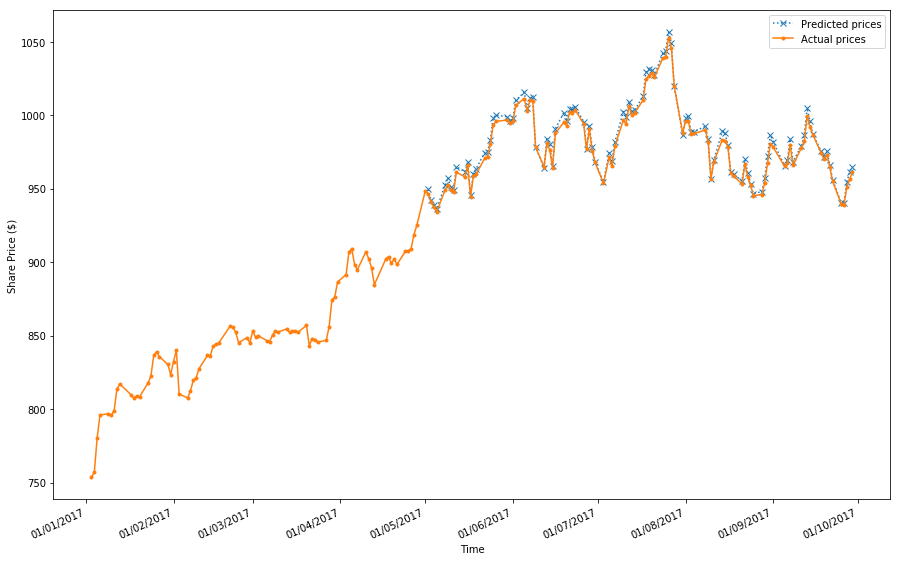

LSTM Score: 2.953 US dollar


In [10]:
amzn_lstm = CompanyLSTM("AMZN", pd_processed[get_relevant_columns_for_company("AMZN")])

train_scaled, test_scaled = amzn_lstm.preprocess_train_test_data(start_train_date, end_train_start_test_date, end_test_date)
amzn_lstm.train_lstm_model(train_scaled)
predictions = amzn_lstm.predict(test_scaled)
amzn_lstm.plot(predictions)
lstm_score = amzn_lstm.score(predictions)
print("LSTM Score: %.3f US dollar" % lstm_score)